## Some data on turtle movement
Using this data from the [folowing paper](https://www.frontiersin.org/journals/marine-science/articles/10.3389/fmars.2023.1105264/full) we will bootstrap the t

Estimated Mean Speed: 1.165 km/h
95% Confidence Interval: (1.091, 1.239) km/h


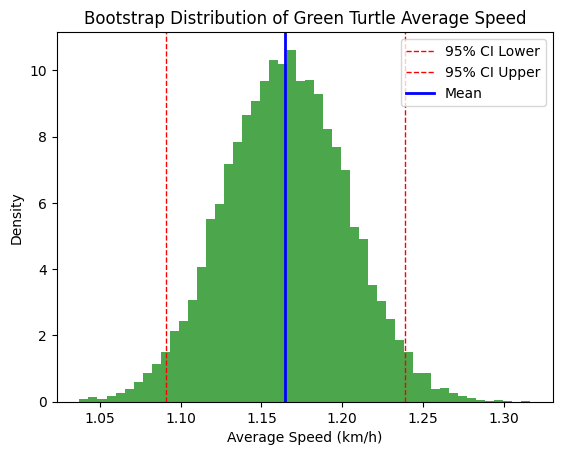

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Step 1: Define the original data
data = [
    {"days": 15, "low": 0.59, "high": 1.08},
    {"days": 41, "low": 0.97, "high": 1.52},
    {"days": 91, "low": 1.08, "high": 2.14},
    {"days": 33, "low": 0.22, "high": 0.27},
    {"days": 23, "low": 0.83, "high": 1.88},
    {"days": 10, "low": 0.16, "high": 0.52}
]

# Step 2: Simulate the dataset
synthetic_speeds = []

for entry in data:
    days = entry["days"]
    low = entry["low"]
    high = entry["high"]
    
    speeds = np.random.uniform(low, high, days)
    synthetic_speeds.extend(speeds)

synthetic_speeds = np.array(synthetic_speeds)

# Step 3: Bootstrap resampling
n_iterations = 10000
bootstrap_means = []

for _ in range(n_iterations):
    sample = resample(synthetic_speeds, replace=True, n_samples=len(synthetic_speeds))
    bootstrap_means.append(np.mean(sample))

# Confidence interval
mean_speed = np.mean(bootstrap_means)
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

print(f"Estimated Mean Speed: {mean_speed:.3f} km/h")
print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f}) km/h")

# Step 5: Plot the bootstrap distribution
plt.hist(bootstrap_means, bins=50, density=True, alpha=0.7, color='green')
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=1, label='95% CI Lower')
plt.axvline(ci_upper, color='red', linestyle='dashed', linewidth=1, label='95% CI Upper')
plt.axvline(mean_speed, color='blue', linestyle='solid', linewidth=2, label='Mean')
plt.title("Bootstrap Distribution of Green Turtle Average Speed")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Density")
plt.legend()
plt.show()


sampling 